/tmp/ipykernel_14393/660556179.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[idx].legend(loc='upper right')


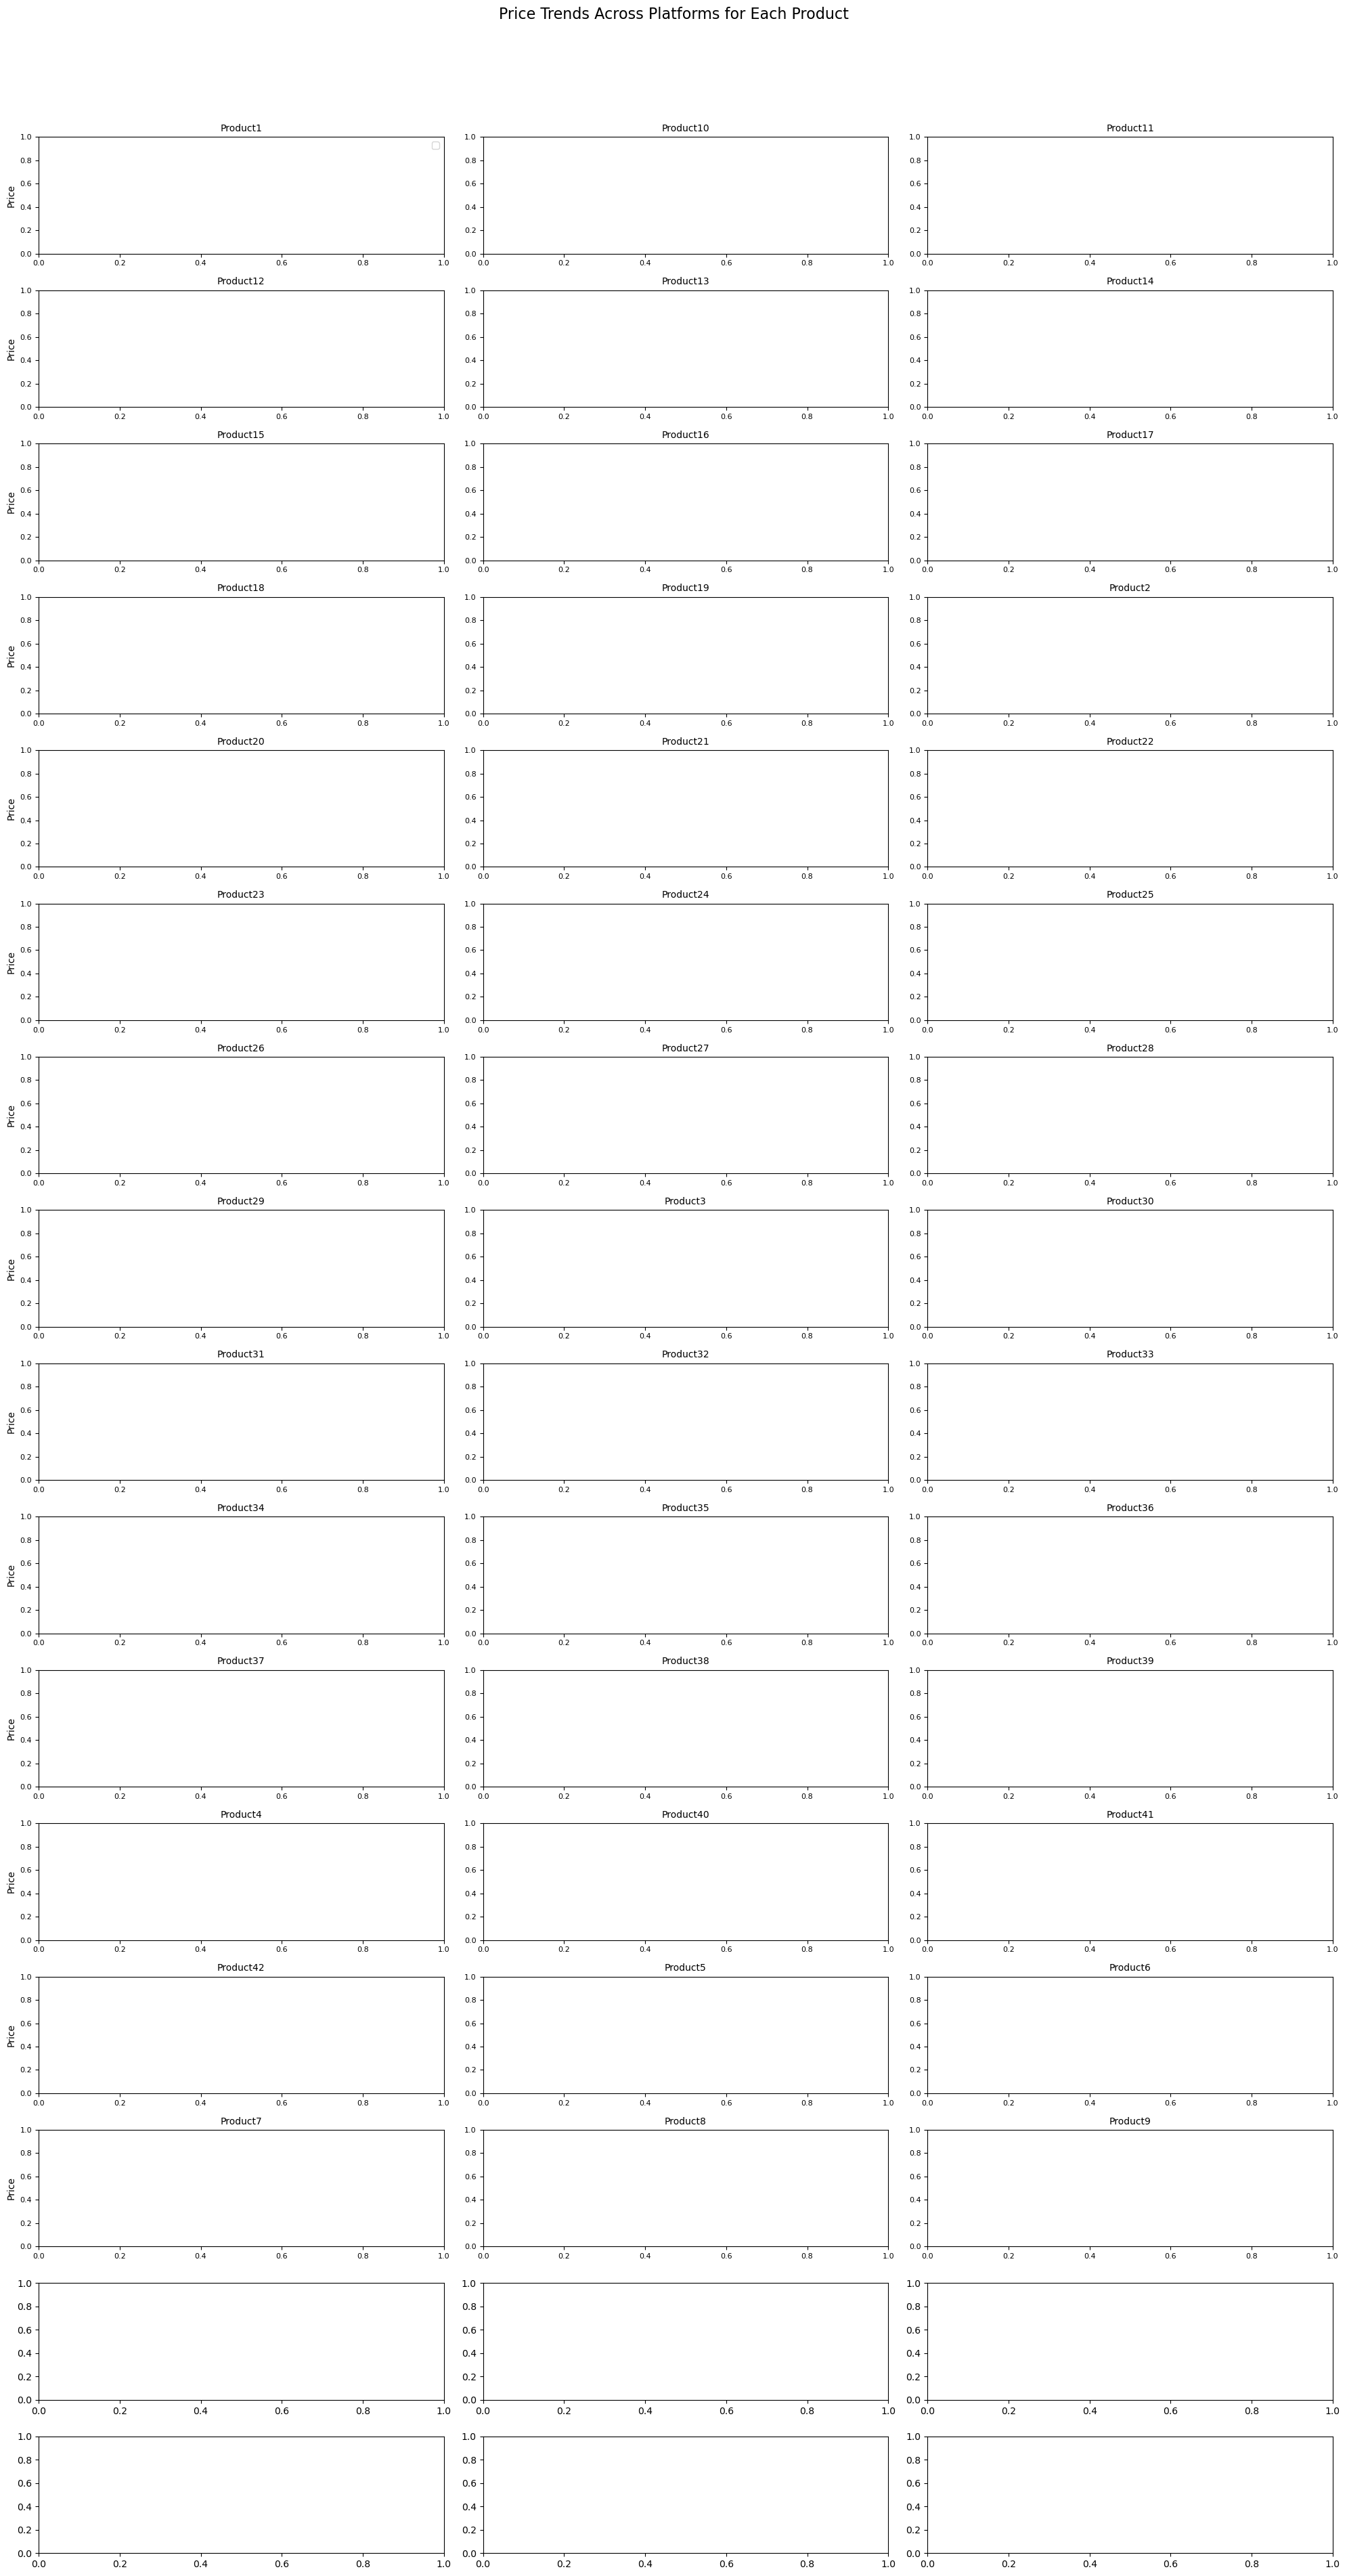

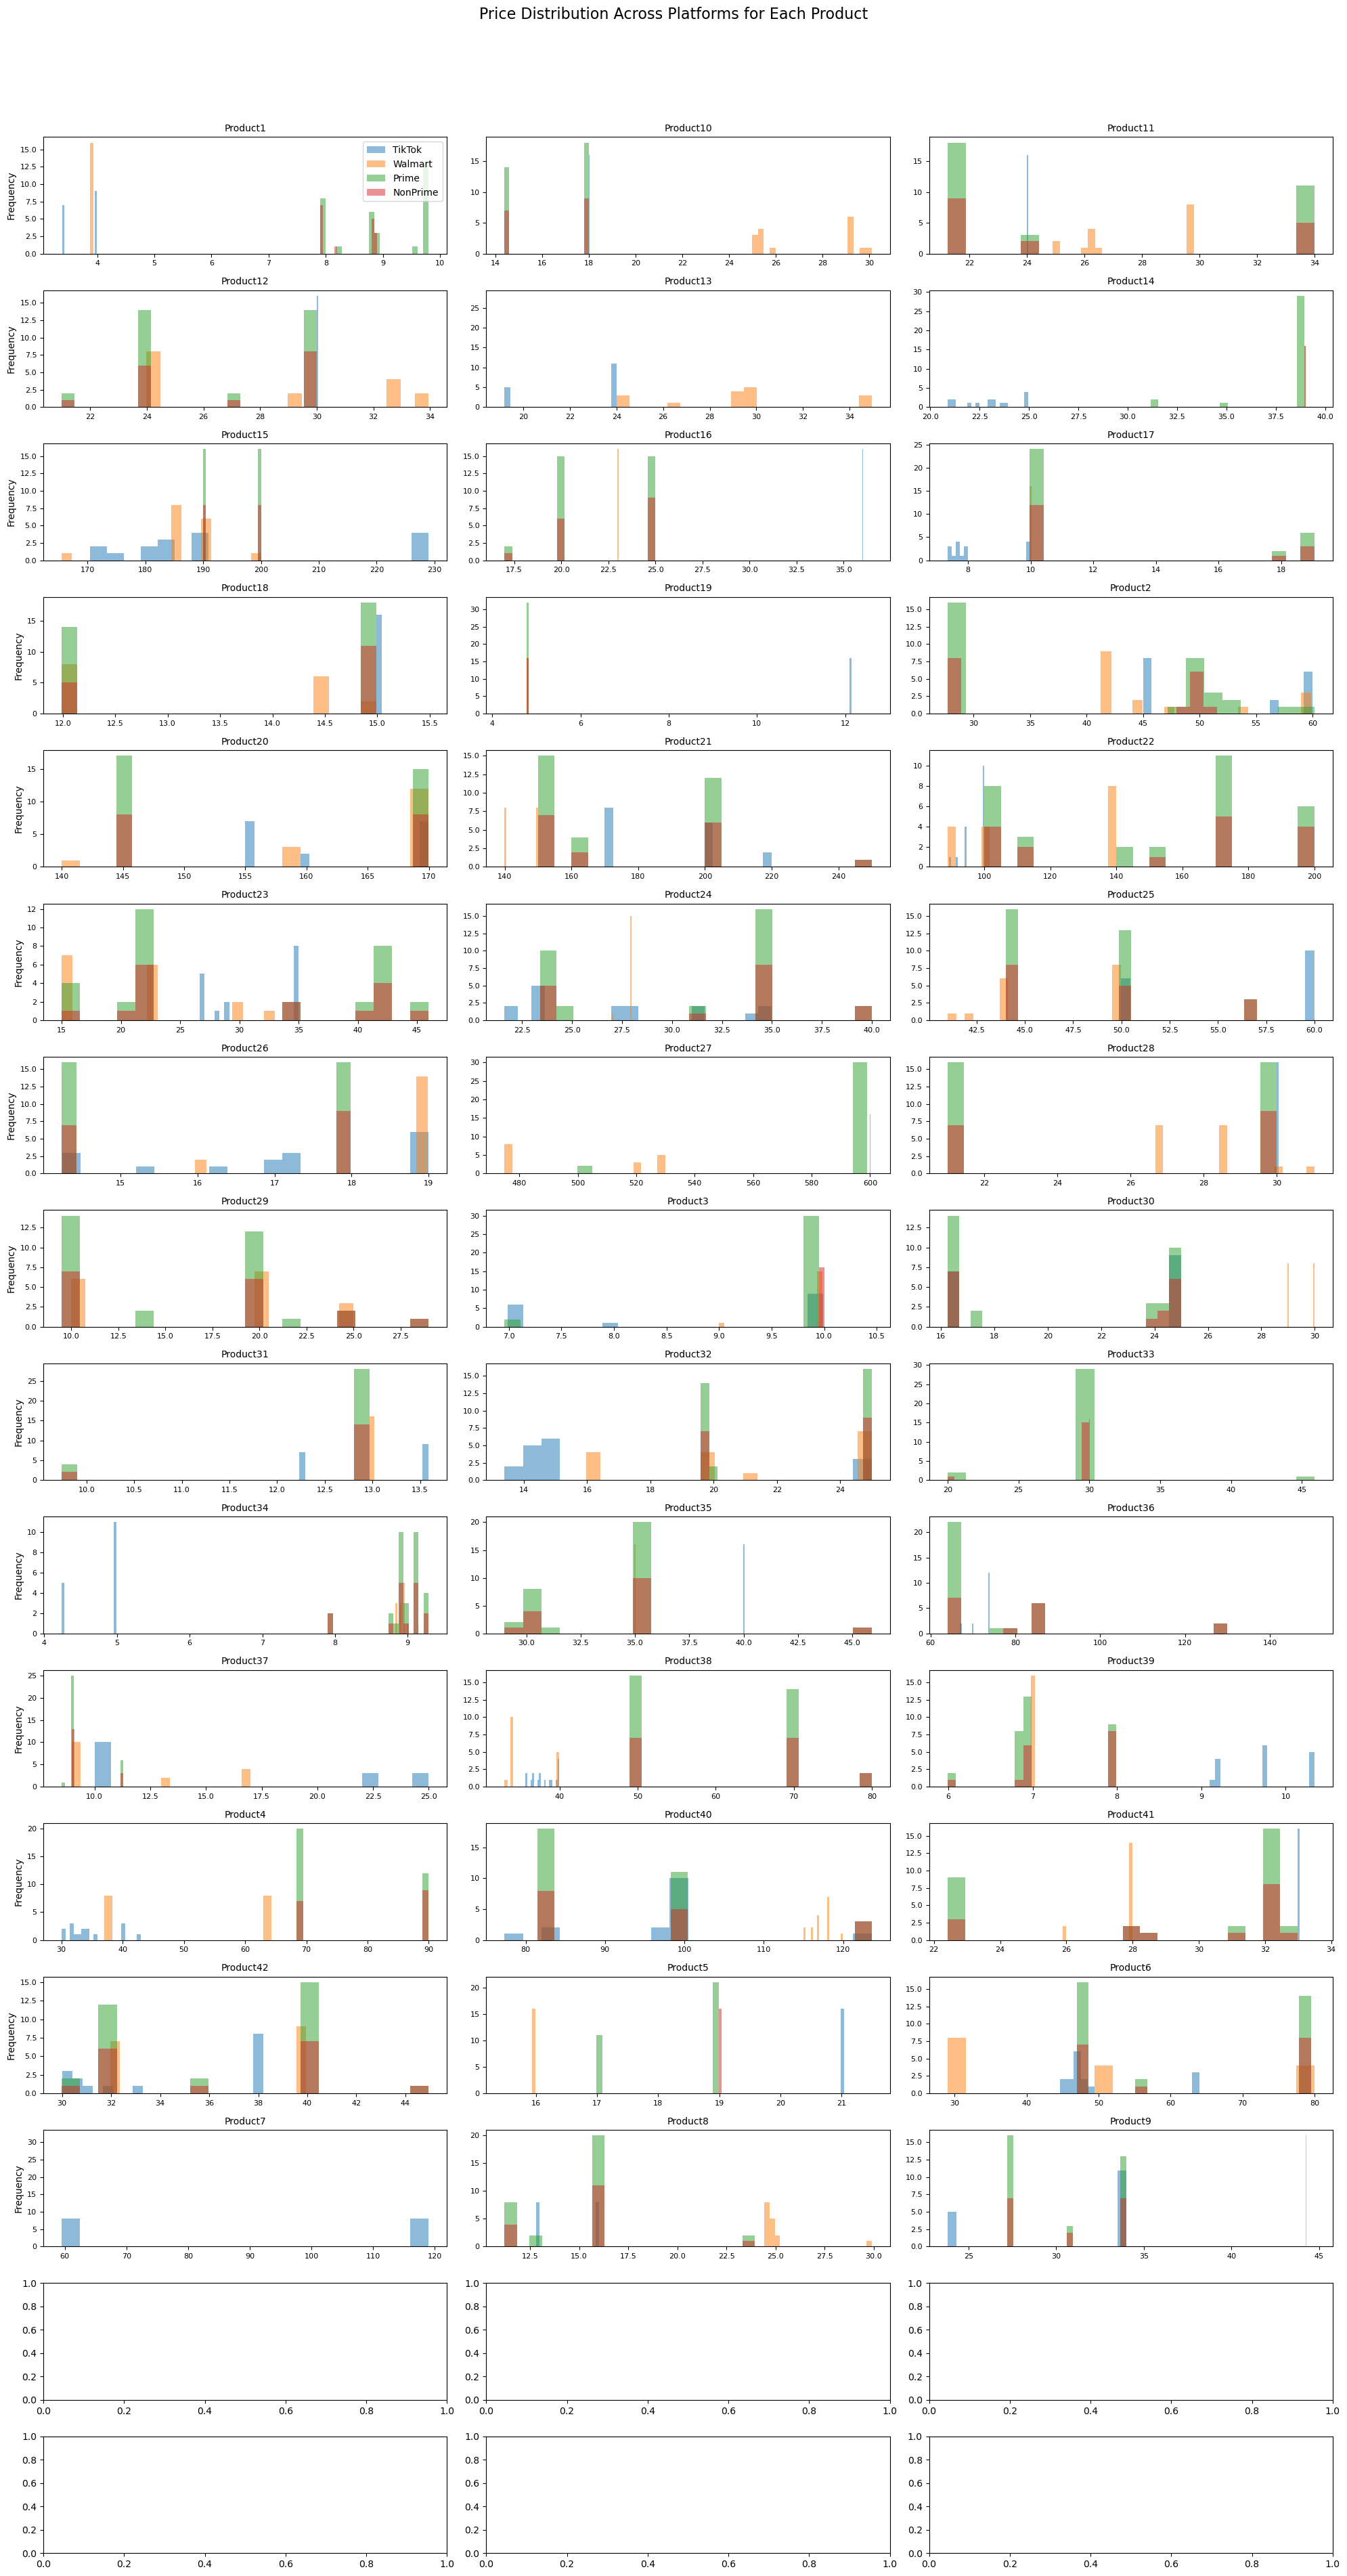

/tmp/ipykernel_14393/660556179.py:139: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[idx].boxplot(summary_data, labels=labels)
/tmp/ipykernel_14393/660556179.py:139: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[idx].boxplot(summary_data, labels=labels)
/tmp/ipykernel_14393/660556179.py:139: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[idx].boxplot(summary_data, labels=labels)
/tmp/ipykernel_14393/660556179.py:139: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[idx].boxplot(summa

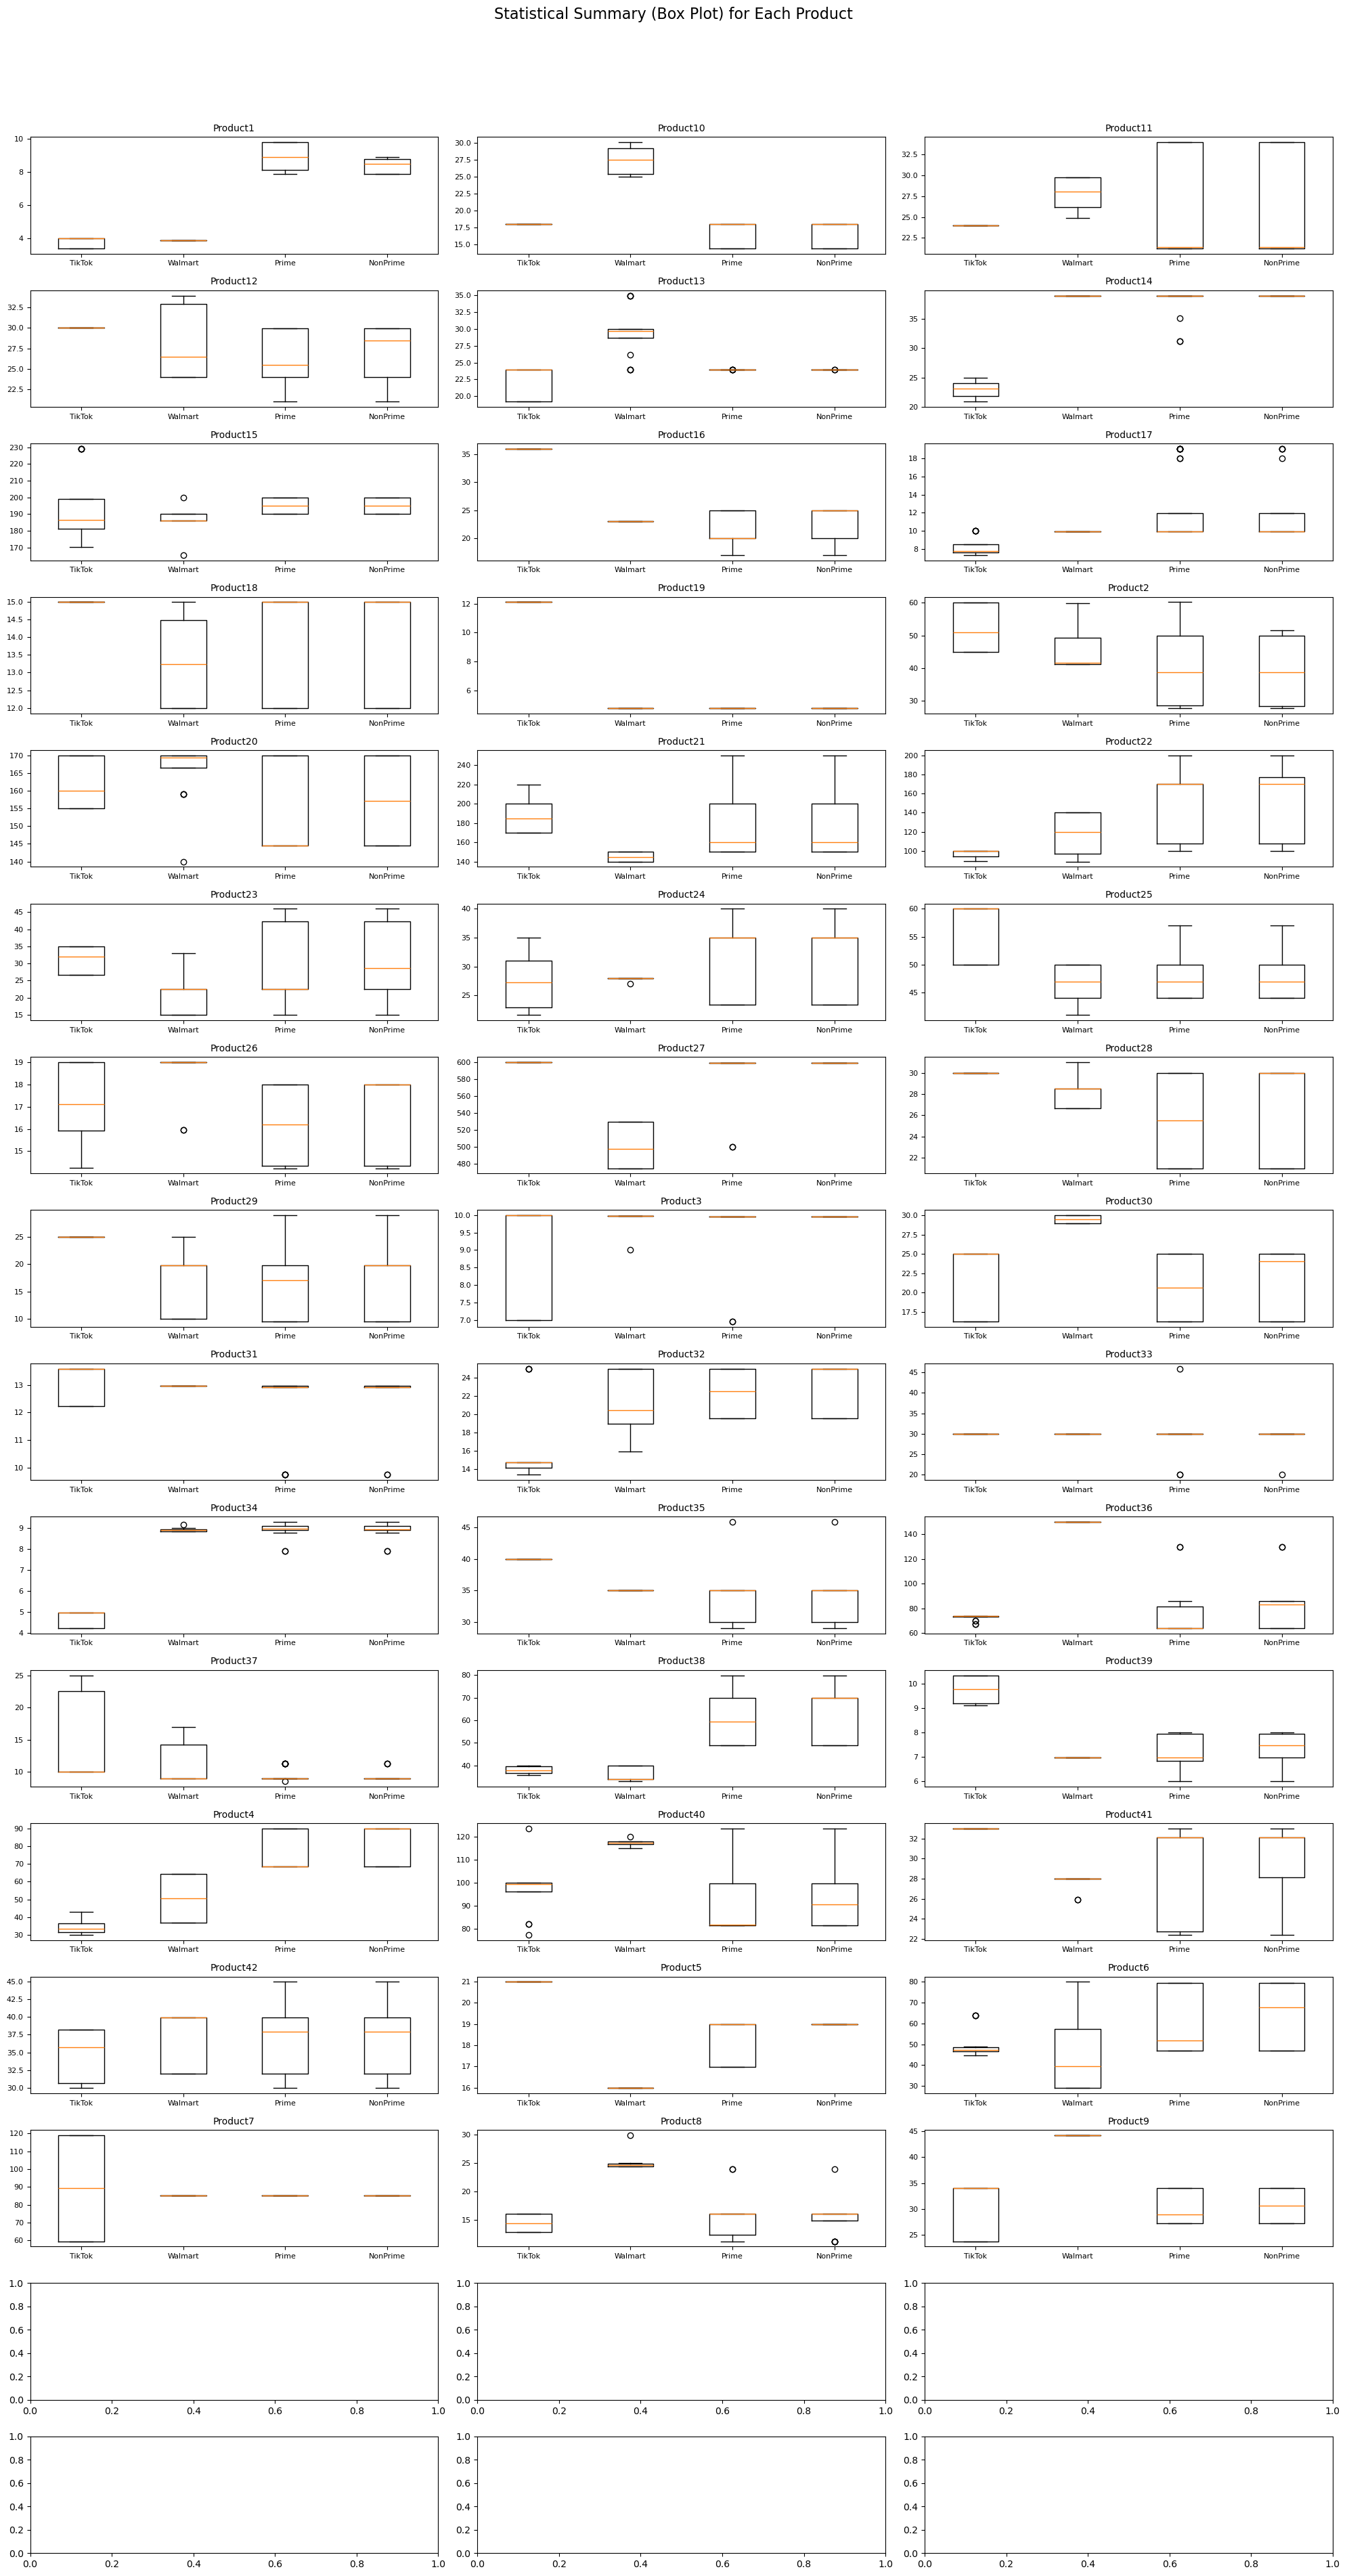

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for each platform
file_paths = {
    "TikTok": "/home/jovyan/Capstone/Capstone/Data/MasterCapstoneData.xlsx - ProductTikTok.csv",
    "Walmart": "/home/jovyan/Capstone/Capstone/Data/MasterCapstoneData.xlsx - ProductWalmart.csv",
    "Prime": "/home/jovyan/Capstone/Capstone/Data/MasterCapstoneData.xlsx - ProductPrime.csv",
    "NonPrime": "/home/jovyan/Capstone/Capstone/Data/MasterCapstoneData.xlsx - ProductNonPrime.csv"
}

# Load and prepare dataframes by adding platform-specific suffixes
def load_and_prepare_dataframe(platform, path):
    df = pd.read_csv(path)
    
    # Rename the first column to 'Product' if it's not already named 'Product'
    if df.columns[0] != 'Product':
        df = df.rename(columns={df.columns[0]: 'Product'})
    
    # Add platform suffix to each price column
    df = df.rename(columns={col: f"{col}_{platform}" for col in df.columns if col != "Product"})
    return df

# Load each DataFrame with platform suffixes
dataframes = {platform: load_and_prepare_dataframe(platform, path) for platform, path in file_paths.items()}

# Merging DataFrames on 'Product' with platform suffixes
def merge_platform_data(dataframes):
    combined_df = dataframes["TikTok"]  # Start with TikTok as the base
    for platform, df in dataframes.items():
        if platform != "TikTok":
            combined_df = pd.merge(combined_df, df, on="Product", how="outer")
    return combined_df

# Merge all data into a single DataFrame
combined_df = merge_platform_data(dataframes)

# List of all product names sorted in numerical order
product_list = sorted(combined_df['Product'].unique())[:46]  # Select the first 46 products for analysis

### Analysis Functions ###

# Function 1: Price Trends for all products in a 16x3 grid
def plot_all_products_price_trend(combined_df, product_list):
    fig, axs = plt.subplots(16, 3, figsize=(20, 40))  # Increased height
    fig.suptitle("Price Trends Across Platforms for Each Product", fontsize=16)

    axs = axs.flatten()

    for idx, product_name in enumerate(product_list):
        product_data = combined_df[combined_df['Product'] == product_name]
        
        if product_data.empty:
            continue  # Skip if no data for product
        
        dates = sorted(set(col.split('_')[0] for col in product_data.columns if 'Price' in col))
        platform_suffixes = {'TikTok': '_TikTok', 'Walmart': '_Walmart', 'Prime': '_Prime', 'NonPrime': '_NonPrime'}

        for platform, suffix in platform_suffixes.items():
            platform_columns = [f"{date}{suffix}" for date in dates if f"{date}{suffix}" in product_data.columns]
            if platform_columns:
                # Convert to numeric and handle non-numeric values by setting them to NaN
                prices = pd.to_numeric(product_data[platform_columns].values.flatten(), errors='coerce')
                prices = prices[~pd.isna(prices)]  # Remove NaN values
                platform_dates = [col.split('_')[0] for col in platform_columns][:len(prices)]
                axs[idx].plot(platform_dates, prices, label=platform)
        
        axs[idx].set_title(product_name, fontsize=10)
        axs[idx].tick_params(labelsize=8)
        if idx % 3 == 0:
            axs[idx].set_ylabel("Price")
        if idx >= 45:
            axs[idx].set_xlabel("Date")

        # Only show legend on the first subplot for cleanliness
        if idx == 0:
            axs[idx].legend(loc='upper right')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Function 2: Histogram Distribution for all products in a 16x3 grid
def plot_all_products_histograms(combined_df, product_list):
    fig, axs = plt.subplots(16, 3, figsize=(20, 40))  # Increased height
    fig.suptitle("Price Distribution Across Platforms for Each Product", fontsize=16)

    axs = axs.flatten()
    for idx, product_name in enumerate(product_list):
        product_data = combined_df[combined_df['Product'] == product_name]
        
        if product_data.empty:
            continue

        platform_suffixes = ['TikTok', 'Walmart', 'Prime', 'NonPrime']
        for platform in platform_suffixes:
            price_columns = [col for col in product_data.columns if platform in col]
            if price_columns:
                platform_prices = pd.to_numeric(product_data[price_columns].stack(), errors='coerce').dropna().values
                axs[idx].hist(platform_prices, bins=20, alpha=0.5, label=platform)

        axs[idx].set_title(product_name, fontsize=10)
        axs[idx].tick_params(labelsize=8)
        if idx % 3 == 0:
            axs[idx].set_ylabel("Frequency")
        if idx >= 45:
            axs[idx].set_xlabel("Price")

        # Only show legend on the first subplot for cleanliness
        if idx == 0:
            axs[idx].legend(loc='upper right')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Function 3: Statistical Summary (Box Plot) for all products in a 16x3 grid
def plot_all_products_boxplot(combined_df, product_list):
    fig, axs = plt.subplots(16, 3, figsize=(20, 40))  # Increased height
    fig.suptitle("Statistical Summary (Box Plot) for Each Product", fontsize=16)

    axs = axs.flatten()
    for idx, product_name in enumerate(product_list):
        product_data = combined_df[combined_df['Product'] == product_name]
        
        if product_data.empty:
            continue

        summary_data = []
        labels = []
        for platform in ['TikTok', 'Walmart', 'Prime', 'NonPrime']:
            price_columns = [col for col in product_data.columns if platform in col]
            if price_columns:
                platform_prices = pd.to_numeric(product_data[price_columns].stack(), errors='coerce').dropna().values
                summary_data.append(platform_prices)
                labels.append(platform)
        
        if summary_data:
            axs[idx].boxplot(summary_data, labels=labels)
            axs[idx].set_title(product_name, fontsize=10)
            axs[idx].tick_params(labelsize=8)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Run each analysis type
plot_all_products_price_trend(combined_df, product_list)
plot_all_products_histograms(combined_df, product_list)
plot_all_products_boxplot(combined_df, product_list)
